<a href="https://colab.research.google.com/github/jmedinaz123/estadistica-con-python-siniestros-/blob/main/Proyecto_Final_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final Siniestro GRUPO II
---------------------------
Integrantes:
JAIME MEDINA / 
MIGUEL LAURENTE /
RICHARD AYLAS /
RINA ARCE /
ROBERTO VALLE






## Paso 1: Tratamiento de datos

In [ ]:
#Es necesario cargar y correr las librerias
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from sklearn.impute import SimpleImputer

In [ ]:
# instalar y ejecutar el paquete estadistico
!pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7454 sha256=0a0d7d03b764a544ecb9bb150e35aed357eceb251f658a6e5e0e1340b850e456
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built statistics


In [ ]:
#Importamos la 'Data Siniestros.csv' desde su ubicación en disco local
from google.colab import files
files.upload()

Saving Data_Siniestros en Seguros (2).csv to Data_Siniestros en Seguros (2).csv


{'Data_Siniestros en Seguros (2).csv': b'Cliente_ID,Antig\xfcedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro\r\n185,44,1,604.86,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n238,79,1,1006.21,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n346,102,1,299.23,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n460,,1,645.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n549,109,,218,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n559,183,,10.32,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n666,172,0,3517.07,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n676,76,1,216.52,0,0,1,0,0,0,0,0,0,0,1,1,1,no\r\n696,136,0,1908.69,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n907,171,0,1895.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n974,93,1,1310.43,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1083,119,1,5085.55,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1186,9,,4871.7,0,0,0,0,0,1,0,0,0,0,0,0,0,no\r\n1196,17,1,193.4,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# Desplegar en el DataFrame que previamente hemos denominado "seguros"
seguros_df = pd.read_csv('Data_Siniestros en Seguros (2).csv',encoding='unicode_escape')
seguros_df.head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [ ]:
seguros_df.info() # Revisar los resultados de cada variable   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

In [ ]:
# En esta sección visualizaremos y analizaremos los datos perdidos

seguros_df.isna().sum()

Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

In [ ]:
# Revisar si la data posee registros duplicados
seguros_df[seguros_df["Cliente_ID"].duplicated()].head()

# De acuerdo al ID, éstos no presentarían registros duplicados

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro



### ESTUDIO DE VARIABLES
    1. De acuerdo al ID, éstos no presentarían registros duplicados
    2. Se tiene en total 5800 filas y 18 columnas
    3. Identificamos que existen variables con datos perdidos
    4. Es necesario validar individualmente el tipo de variable
       *   Cliente_ID -> No presenta valores perdidos, typo de variable es CORRECTA
       *   **Antigüedad_Maxima -> Tiene valores perdidos, typo de variable es Incorrecta (debe ser int64)**
       *   **Nivel_Ingresos -> Tiene valores perdidos, typo de variable es Incorrecta (debe ser CUALITATIVA)**
       *   Saldo_Pendiente -> No presenta valores perdidos, typo de variable es CORRECTA
       *   **Puntaje_Morosidad -> Tiene valores perdidos, typo de variable es INcorrecta (debe ser CUALITATIVA)**
       *   Saldo_Pendiente_Seg -> No presenta valores perdidos, typo de variable es CORRECTA
       *   Siniestros -> No presenta valores perdidos, typo de variable es CORRECTA
       *   **Estado_Siniestro -> Tiene valores perdidos, typo de variable es CORRECTA (VARIABLE DEPENDIENTE)**



##EXCLUSIÓN DE VALORES PERDIDOS EN LA VARIABLE DEPENDIENTE
Los datos procesados hasta este momento, ha permitido identificar valores perdidos, los mismos que al ser dicutidos en grupo, deben de ser excluidos, para esta tarea, se identifican las filas (variable dependiente) del campo Estado_Siniestro, teniendo:

Con la ayuda de un profesional afin, se pudo notar que "Estado_Siniestro", es una variable dependiente o respuesta y que es resultado de la interrelación de todas las variables revisadas.
Es necesario contar con datos completos o un número mayor de datos, que para este caso no fue posible obtener.
Bloque con sangría

La generación de la variable dependiente obedece a una fórmula, que no fue posible identificar.
El comportamiento de los datos, están sujetos a sesgos o inconsistencias, lo que podría estar relacionado a la imputación de valores sobre la variable dependiente.
El universo de nuetsros datos (5800), nos permite poder excluir o amputar el 18% de sus registros, logrando obtener resultados óptimos reflejados para una mayor comprensión por su regresión logística, a comparación de una imputación de datos.
  

In [ ]:
# Se realiza la amputación de datos perdidos en Estado_Siniestro
seguros_df.dropna(subset = ["Estado_Siniestro"], axis = 0, inplace = True)
seguros_df.info()
seguros_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           4732 non-null   int64  
 1   Antigüedad_Maxima    4250 non-null   float64
 2   Nivel_Ingresos       4501 non-null   float64
 3   Saldo_Pendiente      4732 non-null   float64
 4   Puntaje_Morosidad1   4732 non-null   int64  
 5   Puntaje_Morosidad2   4732 non-null   float64
 6   Puntaje_Morosidad3   4731 non-null   float64
 7   Puntaje_Morosidad4   4729 non-null   float64
 8   Puntaje_Morosidad5   4728 non-null   float64
 9   Puntaje_Morosidad6   4728 non-null   float64
 10  Saldo_Pendiente_Seg  4732 non-null   float64
 11  Siniestros1          4732 non-null   int64  
 12  Siniestros2          4732 non-null   int64  
 13  Siniestros3          4732 non-null   int64  
 14  Siniestros4          4732 non-null   int64  
 15  Siniestros5          4732 non-null   i

Cliente_ID               0
Antigüedad_Maxima      482
Nivel_Ingresos         231
Saldo_Pendiente          0
Puntaje_Morosidad1       0
Puntaje_Morosidad2       0
Puntaje_Morosidad3       1
Puntaje_Morosidad4       3
Puntaje_Morosidad5       4
Puntaje_Morosidad6       4
Saldo_Pendiente_Seg      0
Siniestros1              0
Siniestros2              0
Siniestros3              0
Siniestros4              0
Siniestros5              0
Siniestros6              0
Estado_Siniestro         0
dtype: int64

### IMPUTACIÓN DE DATOS PERDIDOS

Aún se puede visualizar variables con datos perdidos por lo que:

a) Crearemos un respaldo de la variable numérica llamado Antigüedad_Maxima_orig, donde se eliminará los datos perdidos.

b) Exploraremos la variable para decidir si imputamos con la media o la mediana

c) IMPUTACIÓN DE DATOS, sobre las variables numéricas y sobre las variables cualitativas de la data principal (seguros)

d) Se verificará la homogeneidad de los datos numéricos originales e imputados, usando la prueba de U de Mann Whitney (se busca que la diferencia de las medias o medianas = 0.
 

In [ ]:
# a) Creación del respaldo de la variable numérica...
Antigüedad_Maxima_orig = seguros_df.loc[:, ['Antigüedad_Maxima']] 
Antigüedad_Maxima_orig.head()

,Antigüedad_Maxima
0,44.0
1,79.0
2,102.0
3,NaN
4,109.0


In [ ]:
# a) ...eliminamos sus datos perdidos
Antigüedad_Maxima_orig.dropna(subset = ["Antigüedad_Maxima"], axis = 0, inplace = True)
Antigüedad_Maxima_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4731
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Antigüedad_Maxima  4250 non-null   float64
dtypes: float64(1)
memory usage: 66.4 KB


<Figure size 432x288 with 0 Axes>

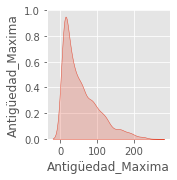

In [ ]:
# b) Exploramos la variable...
plt.figure(figsize=(6,4)) # Se observa que tiene una curva asimétrica hacia la derecha

sns.pairplot(Antigüedad_Maxima_orig, diag_kind='kde');

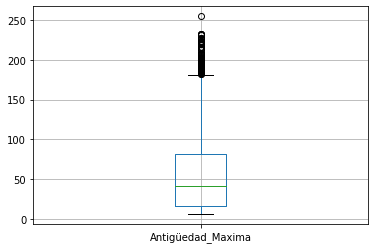

In [ ]:
# c) Exploramos la variable en el gráfico de cajas...
Antigüedad_Maxima_orig.boxplot(figsize=(6,4)) # Se observa en la caja que existen una gran cantidad de datos perdidos
                                              # estos jalaran la media
plt.show()

In [ ]:
# b) ...explorando su media...
def media(x):
  return stats.mean(x)
Antigüedad_Maxima_orig.apply(media, axis=0).round(2)


Antigüedad_Maxima    54.98
dtype: float64

In [ ]:
# b) ...explorando los intervalos de coanfianza de la media...
import scipy.stats as st
# crear un intervalo de confianza del 95% para el peso medio de la población
st.t.interval(alpha=0.95, df=len(Antigüedad_Maxima_orig)-1,

              loc=np.mean(Antigüedad_Maxima_orig),

              scale=st.sem(Antigüedad_Maxima_orig))

(array([53.55761558]), array([56.41085501]))

In [ ]:
# b) ...explorando su mediana...
def mediana(x):
  return stats.median(x)
Antigüedad_Maxima_orig.apply(mediana, axis=0).round(2)
# La mediana no cae dentro del intervalo de confianza al 95%

Antigüedad_Maxima    41.0
dtype: float64

In [ ]:
# b) ...explorando su media armónica...
def media_armonica(x):
  return stats.harmonic_mean(x)
Antigüedad_Maxima_orig.apply(media_armonica, axis=0).round(2)

Antigüedad_Maxima    22.83
dtype: float64

In [ ]:
# b) ...explorando su desviación estandar...
desv_estandar = stats.stdev(Antigüedad_Maxima_orig["Antigüedad_Maxima"])
round(desv_estandar, 2)
# Su desviación estandar es muy alta

47.44

In [ ]:
# b) ...explorando su curtosis...
def kurtosis_data(x):
  curtosis =  kurtosis(x, fisher=True)

  if curtosis >0:
    return ('Es Leptocúrtica-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    return  ('Es Mesocúrtica-->', round(curtosis,2 ))
  else:
    return  ('Es Platicúrtica-->', round(curtosis,2 ))

In [ ]:
# b) ...explorando su curtosis...
Antigüedad_Maxima_orig.apply(kurtosis_data, axis=0)

,Antigüedad_Maxima
0,Es Leptocúrtica-->
1,0.97


In [ ]:
# b) ...explorando su normalidad con Kolmogorov-Smirnov...
# PLANTEAMIENTO DE LAS HIPóTESIS
  # Ho: Los datos estan normalmente distribuidos
  # Ha: Los datos no estan normalmente distribuidos
    # Nivel de significancia = 5% (0.05)

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest  # n > 50
stat2, p2 = kstest(Antigüedad_Maxima_orig['Antigüedad_Maxima'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Decisión: 
Con un nivel de significancia del 5%, se afirma que, los datos de la variable Antiguedad_Maxima no están normalmente distribuidos.
Por tanto: Considerando los estadísticos de la variable, se realizará la Imputación con la MEDIANA. 

In [ ]:
# c) IMPUTACIÓN DE DATOS: Separando las variables numéricas de las categóricas...
# Data numérica = 'antiguedad_maxima', 'saldo_pendiente','Saldo_pendiente_seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4' ,'Siniestros5','Siniestros6'
# Data categórica = 'Cliente_ID', 'Nivel_Ingresos', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3' , 'Puntaje_Morosidad4','Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Estado_Siniestro'
seguros_numerico = seguros_df.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6']] 
seguros_categorico = seguros_df.loc[:, ['Cliente_ID', 'Nivel_Ingresos', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3' , 'Puntaje_Morosidad4','Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Estado_Siniestro']] 
seguros_numerico.info()

seguros_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    4250 non-null   float64
 1   Saldo_Pendiente      4732 non-null   float64
 2   Saldo_Pendiente_Seg  4732 non-null   float64
 3   Siniestros1          4732 non-null   int64  
 4   Siniestros2          4732 non-null   int64  
 5   Siniestros3          4732 non-null   int64  
 6   Siniestros4          4732 non-null   int64  
 7   Siniestros5          4732 non-null   int64  
 8   Siniestros6          4732 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 369.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cliente_ID          4732 non-null   int64  
 1   Nivel_Ingresos      4501 non-null 

In [ ]:
# c) ...Imputando la variable numérica con la mediana...
simple = SimpleImputer(strategy='median')
seguros_numf = simple.fit_transform(seguros_numerico)

seguros_numf

array([[4.40000e+01, 6.04860e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.90000e+01, 1.00621e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.02000e+02, 2.99230e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.10000e+01, 3.00850e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.50000e+01, 3.21891e+03, 0.00000e+00, ..., 4.00000e+00,
        2.00000e+00, 2.00000e+00],
       [6.00000e+00, 8.49970e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
# c) ...Imputando las variables categóricas con la moda...

simple = SimpleImputer(strategy='most_frequent')  # Moda
seguros_catf = simple.fit_transform(seguros_categorico)

seguros_catf

array([[185, 1.0, 0, ..., 0.0, 0.0, 'no'],
       [238, 1.0, 0, ..., 0.0, 0.0, 'no'],
       [346, 1.0, 0, ..., 0.0, 0.0, 'no'],
       ...,
       [789789, 0.0, 0, ..., 0.0, 0.0, 'si'],
       [790095, 1.0, 3, ..., 7.0, 7.0, 'si'],
       [790771, 0.0, 2, ..., 0.0, 0.0, 'si']], dtype=object)

In [ ]:
# c) ...Creamos el dataframe df1 donde creamos las columnas de las variables numéricas...
df1 = pd.DataFrame(
    data=seguros_numf,
    columns=['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6'])

df1.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Antigüedad_Maxima    4732 non-null   bool 
 1   Saldo_Pendiente      4732 non-null   bool 
 2   Saldo_Pendiente_Seg  4732 non-null   bool 
 3   Siniestros1          4732 non-null   bool 
 4   Siniestros2          4732 non-null   bool 
 5   Siniestros3          4732 non-null   bool 
 6   Siniestros4          4732 non-null   bool 
 7   Siniestros5          4732 non-null   bool 
 8   Siniestros6          4732 non-null   bool 
dtypes: bool(9)
memory usage: 41.7 KB


In [ ]:
# c) ...Creamos el dataframe df2 donde creamos las columnas de las variables categóricas...
df2 = pd.DataFrame(
    data=seguros_catf,
    columns=['Cliente_ID', 'Nivel_Ingresos', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3' , 'Puntaje_Morosidad4','Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Estado_Siniestro'])

df2.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Cliente_ID          4732 non-null   bool 
 1   Nivel_Ingresos      4732 non-null   bool 
 2   Puntaje_Morosidad1  4732 non-null   bool 
 3   Puntaje_Morosidad2  4732 non-null   bool 
 4   Puntaje_Morosidad3  4732 non-null   bool 
 5   Puntaje_Morosidad4  4732 non-null   bool 
 6   Puntaje_Morosidad5  4732 non-null   bool 
 7   Puntaje_Morosidad6  4732 non-null   bool 
 8   Estado_Siniestro    4732 non-null   bool 
dtypes: bool(9)
memory usage: 41.7 KB


In [ ]:
# c) ...Corregimos el tipo de variable de las categóricas...
df2 = df2.astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cliente_ID          4732 non-null   object
 1   Nivel_Ingresos      4732 non-null   object
 2   Puntaje_Morosidad1  4732 non-null   object
 3   Puntaje_Morosidad2  4732 non-null   object
 4   Puntaje_Morosidad3  4732 non-null   object
 5   Puntaje_Morosidad4  4732 non-null   object
 6   Puntaje_Morosidad5  4732 non-null   object
 7   Puntaje_Morosidad6  4732 non-null   object
 8   Estado_Siniestro    4732 non-null   object
dtypes: object(9)
memory usage: 332.8+ KB


In [ ]:
# c) ...Corregimos el tipo de variable de las numéricas tipo float...
df1a = df1.loc[:, ['Saldo_Pendiente', 'Saldo_Pendiente_Seg']].astype(float)
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Saldo_Pendiente      4732 non-null   float64
 1   Saldo_Pendiente_Seg  4732 non-null   float64
dtypes: float64(2)
memory usage: 74.1 KB


In [ ]:
# c) ...Corregimos el tipo de variable de las numéricas tipo int64...
df1b = df1.loc[:, ['Antigüedad_Maxima', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6']].astype(int)
df1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Antigüedad_Maxima  4732 non-null   int64
 1   Siniestros1        4732 non-null   int64
 2   Siniestros2        4732 non-null   int64
 3   Siniestros3        4732 non-null   int64
 4   Siniestros4        4732 non-null   int64
 5   Siniestros5        4732 non-null   int64
 6   Siniestros6        4732 non-null   int64
dtypes: int64(7)
memory usage: 258.9 KB


In [ ]:
# c) ...Unimos nuevamente en df1 las variable numéricas corregidas...
df1 = pd.merge(df1a, df1b, left_index=True, right_index=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Saldo_Pendiente      4732 non-null   float64
 1   Saldo_Pendiente_Seg  4732 non-null   float64
 2   Antigüedad_Maxima    4732 non-null   int64  
 3   Siniestros1          4732 non-null   int64  
 4   Siniestros2          4732 non-null   int64  
 5   Siniestros3          4732 non-null   int64  
 6   Siniestros4          4732 non-null   int64  
 7   Siniestros5          4732 non-null   int64  
 8   Siniestros6          4732 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 332.8 KB


In [ ]:
# c) ...Unimos las numéricas y las categóricas en un solo data frame que llamaremos seguros_vp0 (seguros con valores perdidos 0)...
seguros_final = pd.merge(df1, df2, left_index=True, right_index=True)
seguros_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Saldo_Pendiente      4732 non-null   float64
 1   Saldo_Pendiente_Seg  4732 non-null   float64
 2   Antigüedad_Maxima    4732 non-null   int64  
 3   Siniestros1          4732 non-null   int64  
 4   Siniestros2          4732 non-null   int64  
 5   Siniestros3          4732 non-null   int64  
 6   Siniestros4          4732 non-null   int64  
 7   Siniestros5          4732 non-null   int64  
 8   Siniestros6          4732 non-null   int64  
 9   Cliente_ID           4732 non-null   object 
 10  Nivel_Ingresos       4732 non-null   object 
 11  Puntaje_Morosidad1   4732 non-null   object 
 12  Puntaje_Morosidad2   4732 non-null   object 
 13  Puntaje_Morosidad3   4732 non-null   object 
 14  Puntaje_Morosidad4   4732 non-null   object 
 15  Puntaje_Morosidad5   4732 non-null   o

In [ ]:
# d) VERIFICACIÓN DE LA HOMOGENEIDAD DE LOS DATOS NUMÉRICOS ORIGINALES E IMPUTADOS...
# separamos la variable numerica imputada
Antigüedad_Maxima_imp = seguros_final.loc[:, ['Antigüedad_Maxima']]
Antigüedad_Maxima_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Antigüedad_Maxima  4732 non-null   int64
dtypes: int64(1)
memory usage: 37.1 KB


In [ ]:
# d) ...llamamos a la variable numérica NO imputada (original)...
Antigüedad_Maxima_orig = Antigüedad_Maxima_orig.astype(int)
Antigüedad_Maxima_orig.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4731
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Antigüedad_Maxima  4250 non-null   int64
dtypes: int64(1)
memory usage: 66.4 KB


In [ ]:
# d) ... Realizamos la Comparación de medianas con la PRUEBA U de Mann Whitney (no paramétrica)

# Diferencia de medianas
# Ho: U1 = U2; de la variable de estudio.
# Ha: U1 <> U2; de la variable de estudio

from scipy.stats import kruskal

KW_test, p =kruskal(Antigüedad_Maxima_orig, Antigüedad_Maxima_imp)

print('Prueba de U de Mann Whitney=%.3f, p-value=%.3f' % (KW_test, p))

Prueba de U de Mann Whitney=0.005, p-value=0.944


Se concluye: Siendo el pValue > 0.05. Se rechaza la Ha por lo que la mediana de las variables originales y las imputadas son estadísticamente iguales, a un nivel de significancia del 5%

## Paso 2: EDA


In [ ]:
# Analisis descriptivo
# Se describe las variables numéricas y se determina sus percentiles
percentiles = [.1, .25, .5, .75, .9]
Descrip = seguros_final.describe(percentiles=percentiles).T
Descrip

,count,mean,std,min,10%,25%,50%,75%,90%,max
Saldo_Pendiente,4732.0,3660.035167,6559.255155,0.01,115.146,465.0925,1299.42,3910.1075,9948.139,124102.08
Saldo_Pendiente_Seg,4732.0,5548.862540,23290.845765,0.00,0.000,0.0000,0.00,0.0000,0.000,442334.80
Antigüedad_Maxima,4732.0,53.559806,45.155622,6.00,9.000,18.0000,41.00,76.0000,119.000,255.00
Siniestros1,4732.0,0.633770,2.666495,0.00,0.000,0.0000,0.00,0.0000,1.000,42.00
Siniestros2,4732.0,0.550719,2.427596,0.00,0.000,0.0000,0.00,0.0000,1.000,40.00
Siniestros3,4732.0,0.493026,2.273554,0.00,0.000,0.0000,0.00,0.0000,1.000,40.00
Siniestros4,4732.0,0.460693,2.247039,0.00,0.000,0.0000,0.00,0.0000,1.000,40.00
Siniestros5,4732.0,0.418005,2.127374,0.00,0.000,0.0000,0.00,0.0000,1.000,40.00
Siniestros6,4732.0,0.384827,2.075831,0.00,0.000,0.0000,0.00,0.0000,1.000,40.00


In [ ]:
# Se importa las librerias necesarias para los gráficos
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

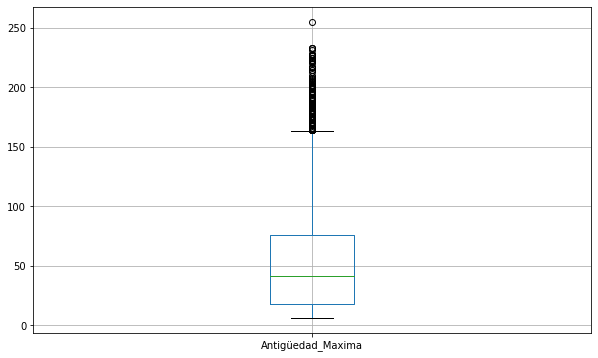

In [ ]:
# Se explora con el gráfico de cajas variable por variable
seguros_final.loc[:, ['Antigüedad_Maxima']].boxplot(figsize=(10,6))
plt.show()

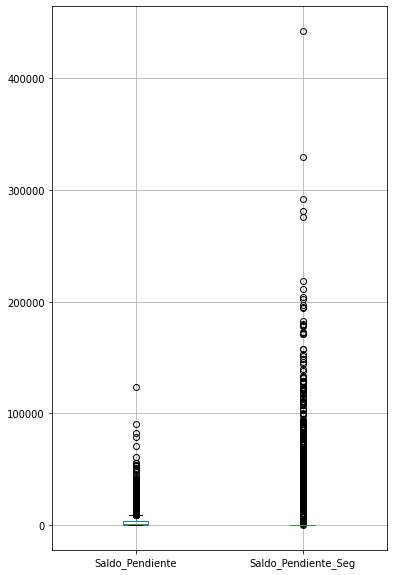

In [ ]:
# Se continua con la exploración de las variables con el gráfico de cajas
seguros_final.loc[:, ['Saldo_Pendiente', 'Saldo_Pendiente_Seg']].boxplot(figsize=(6,10))
plt.show()

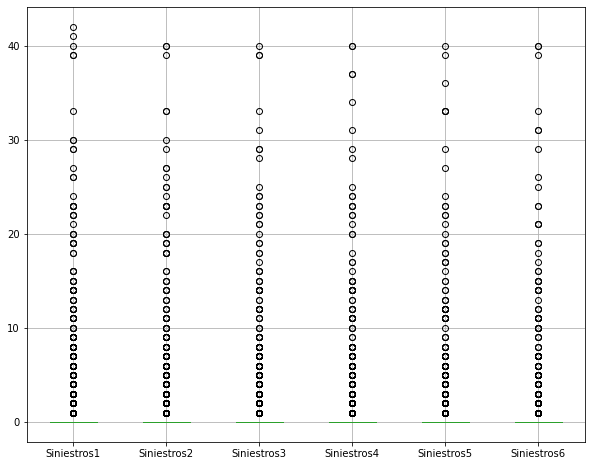

In [ ]:
# Se continua con la exploración de las variables con el gráfico de cajas
seguros_final.loc[:, ['Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6']].boxplot(figsize=(10,8))
plt.show()

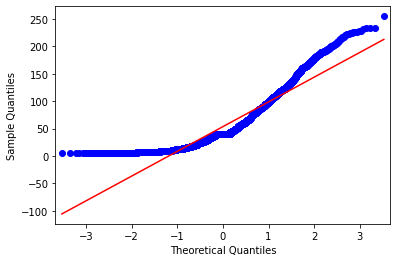

In [ ]:
# Se explora con qqplot variable por variable y se va observando que no existe normalidad
qqplot(seguros_final['Antigüedad_Maxima'] , line='s')
plt.show()

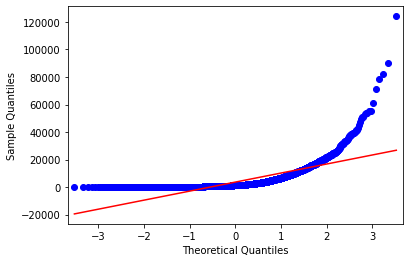

In [ ]:
# Se continua explorando con qqplot sin observar normalidad
qqplot(seguros_final['Saldo_Pendiente'] , line='s')
plt.show()

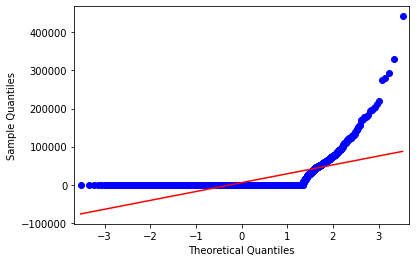

In [ ]:
# Se continua explorando con qqplot sin observar normalidad
qqplot(seguros_final['Saldo_Pendiente_Seg'] , line='s')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


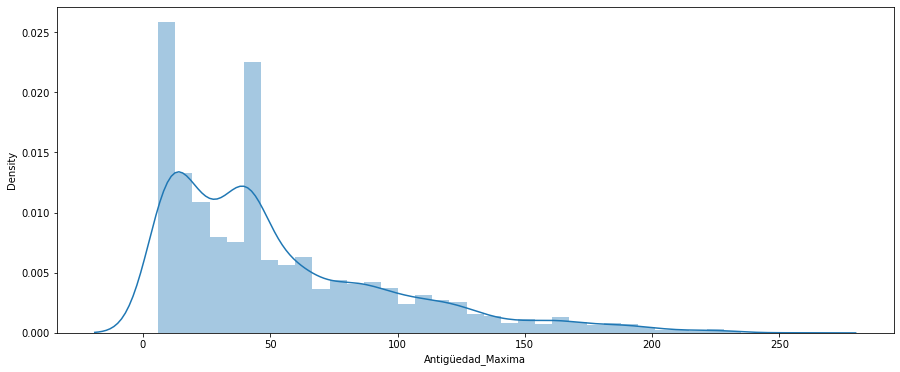

In [ ]:
# Se explora con un histograma variable por variable
plt.figure(figsize=(15,6))
sns.distplot(seguros_final['Antigüedad_Maxima'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


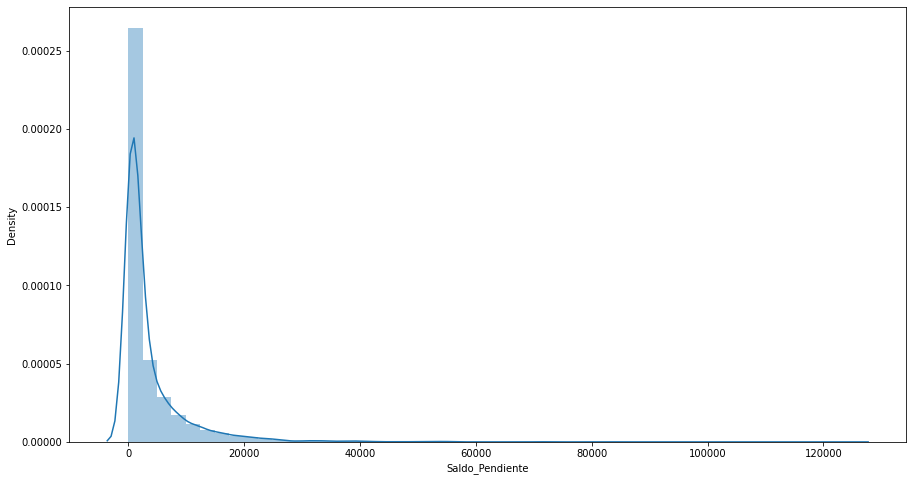

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,8))
sns.distplot(seguros_final['Saldo_Pendiente'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


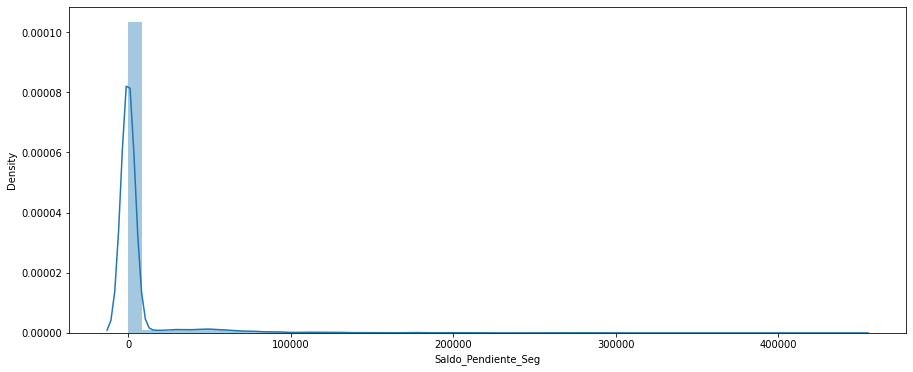

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,6))
sns.distplot(seguros_final['Saldo_Pendiente_Seg'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


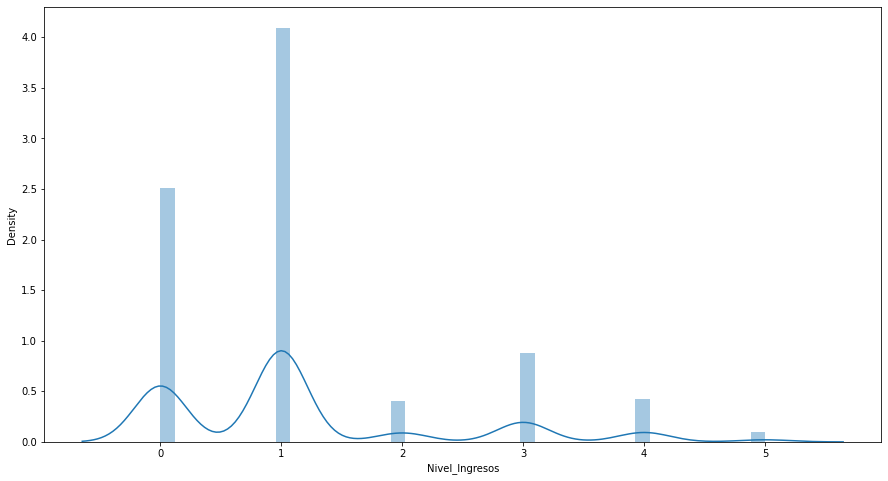

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,8))
sns.distplot(seguros_final['Nivel_Ingresos'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


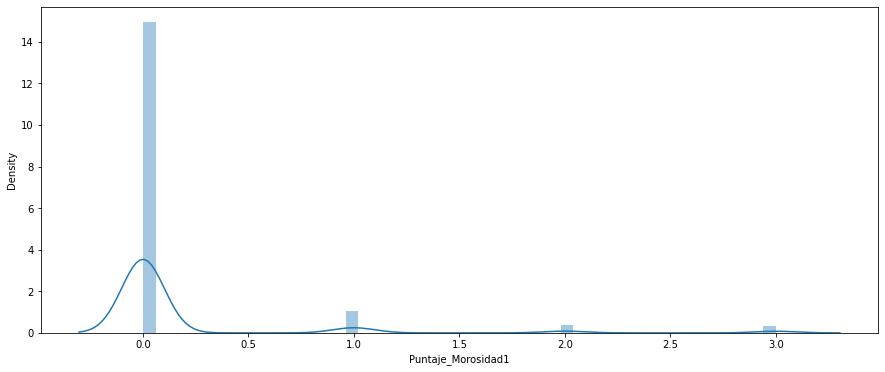

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,6))
sns.distplot(seguros_final['Puntaje_Morosidad1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


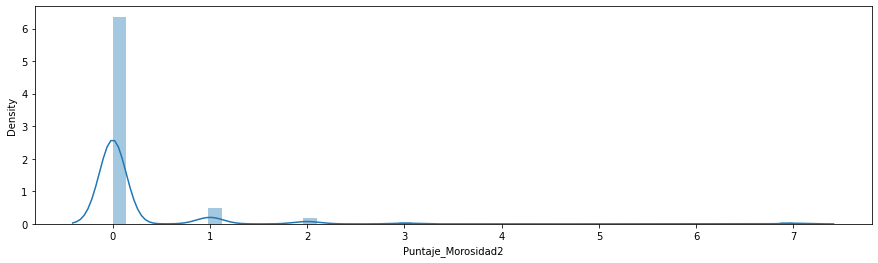

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,4))
sns.distplot(seguros_final['Puntaje_Morosidad2'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


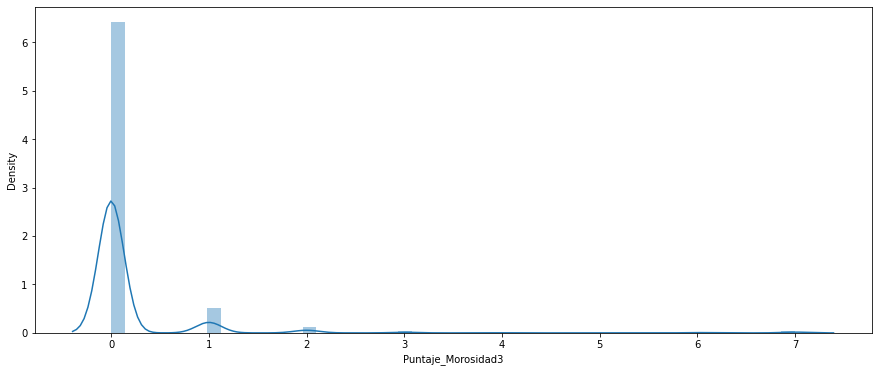

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,6))
sns.distplot(seguros_final['Puntaje_Morosidad3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


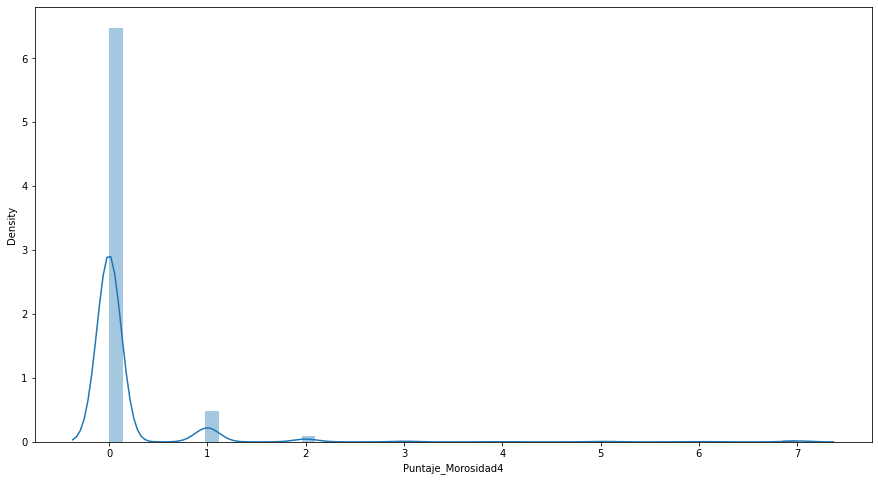

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,8))
sns.distplot(seguros_final['Puntaje_Morosidad4'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


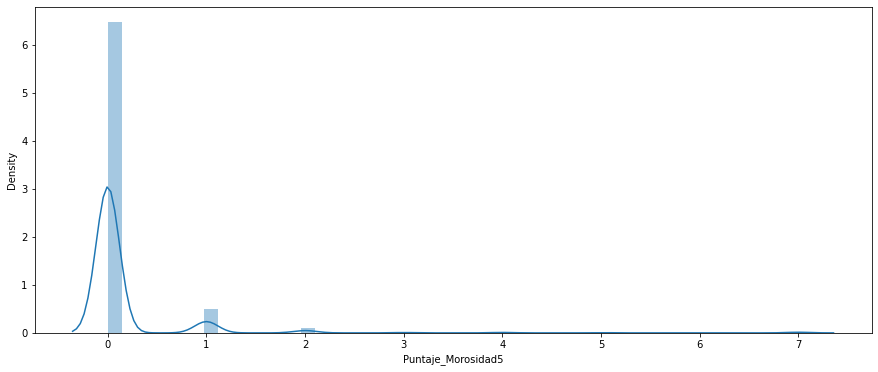

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,6))
sns.distplot(seguros_final['Puntaje_Morosidad5'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


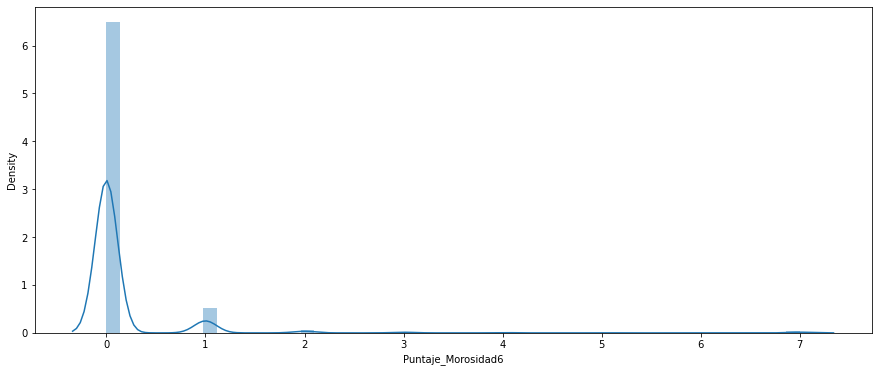

In [ ]:
# Se continua explorando con histograma cada variable
plt.figure(figsize=(15,6))
sns.distplot(seguros_final['Puntaje_Morosidad6'])
plt.show()

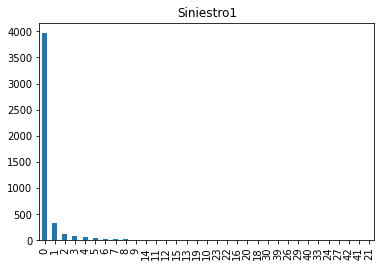

In [ ]:
# Se continua explorando viendo las frecuencias de cada variable
# Ahora vamos con las Variables cualitativas

d1 = seguros_final.Siniestros1.value_counts()
d1.plot(kind='bar', title='Siniestro1')

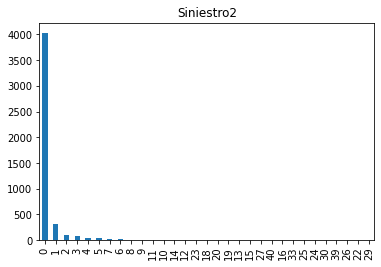

In [ ]:
# Se continua explorando viendo las frecuencias de cada variable
d1 = seguros_final.Siniestros2.value_counts()
d1.plot(kind='bar', title='Siniestro2')

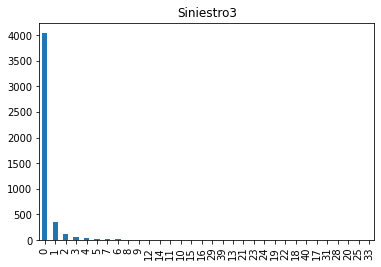

In [ ]:
# Se continua explorando viendo las frecuencias de cada variable
d1 = seguros_final.Siniestros3.value_counts()
d1.plot(kind='bar', title='Siniestro3')

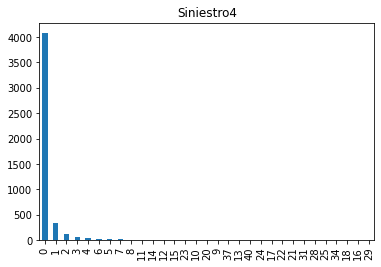

In [ ]:
# Se continua explorando viendo las frecuencias de cada variable
d1 = seguros_final.Siniestros4.value_counts()
d1.plot(kind='bar', title='Siniestro4')

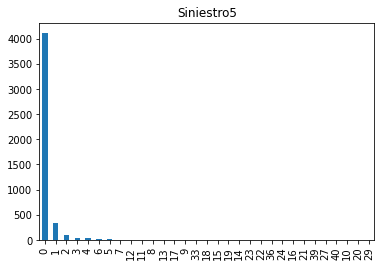

In [ ]:
# Se continua explorando viendo las frecuencias de cada variable
d1 = seguros_final.Siniestros5.value_counts()
d1.plot(kind='bar', title='Siniestro5')

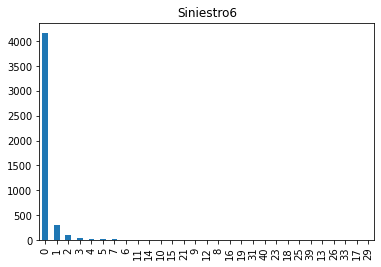

In [ ]:
# Se continua explorando viendo las frecuencias de cada variable
d1 = seguros_final.Siniestros6.value_counts()
d1.plot(kind='bar', title='Siniestro6')

#### PRUEBAS DE NORMALIDAD

In [ ]:
# Se realiza pruebas de normalidad variable por variable
# PLANTEAMIENTO DE LAS HIPóTESIS
  # Ho: Los datos estan normalmente distribuidos
  # Ha: Los datos no estan normalmente distribuidos
    # Nivel de significancia = 5% (0.05)
stat3, p3 = kstest(seguros_final['Antigüedad_Maxima'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))
# Vemos que los datos de la variable no esta normalmente distribuidos

Estadisticos=1.000, p-value=0.000


In [ ]:
# Se realiza pruebas de normalidad a las variables
# Vemos que los datos no esta normalmente distribuidos
stat4, p4 = kstest(seguros_final['Saldo_Pendiente'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat4, p4))

Estadisticos=0.977, p-value=0.000


In [ ]:
# Se realiza pruebas de normalidad a las variables
# Vemos que los datos no esta normalmente distribuidos
stat5, p5 = kstest(seguros_final['Saldo_Pendiente_Seg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat5, p5))

Estadisticos=0.500, p-value=0.000


Conclusion Los datos no estan normalmente distribuidos a un Nivel de significancia del 5%, por lo que se realizará pruebas NO PARAMETRICAS


In [ ]:
# Repasamos las variables ya que intentaremos realizar una normalización 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Saldo_Pendiente      4732 non-null   float64
 1   Saldo_Pendiente_Seg  4732 non-null   float64
 2   Antigüedad_Maxima    4732 non-null   int64  
 3   Siniestros1          4732 non-null   int64  
 4   Siniestros2          4732 non-null   int64  
 5   Siniestros3          4732 non-null   int64  
 6   Siniestros4          4732 non-null   int64  
 7   Siniestros5          4732 non-null   int64  
 8   Siniestros6          4732 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 332.8 KB


In [ ]:
# Intentamos la normalización con Sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
seguros_num_norm = scaler.fit_transform(df1)
seguros_num_norm

array([[0.00487381, 0.        , 0.15261044, ..., 0.        , 0.        ,
        0.        ],
       [0.00810784, 0.        , 0.29317269, ..., 0.        , 0.        ,
        0.        ],
       [0.00241108, 0.        , 0.38554217, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00242413, 0.        , 0.06024096, ..., 0.        , 0.        ,
        0.        ],
       [0.02593752, 0.        , 0.07630522, ..., 0.1       , 0.05      ,
        0.05      ],
       [0.00684888, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Lo subimos a un dataframe y le asignamos las columnas
seguros_num_norm2 = pd.DataFrame(
    data=seguros_num_norm,
    columns=['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6'])
seguros_num_norm2.head()

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,0.004874,0.0,0.152610,0.0,0.0,0.0,0.0,0.0,0.0
1,0.008108,0.0,0.293173,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002411,0.0,0.385542,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005199,0.0,0.140562,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001757,0.0,0.413655,0.0,0.0,0.0,0.0,0.0,0.0


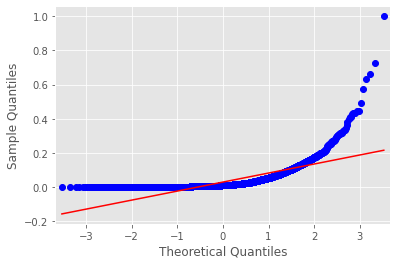

In [ ]:
# Exploramos con qqplot como se comporta su curva ahora
qqplot(seguros_num_norm2['Antigüedad_Maxima'] , line='s')
plt.show()

In [ ]:
# Realizamos la prueba de normalidad con los datos ajustados usando Kolmogorov
# PLANTEAMIENTO DE LAS HIPóTESIS
  # Ho: Los datos estan normalmente distribuidos
  # Ha: Los datos no estan normalmente distribuidos
  # Nivel de significancia = 5% (0.05)

stat3, p3 = kstest(seguros_num_norm2['Antigüedad_Maxima'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Estadisticos=0.500, p-value=0.000


Conclusión: Con un nivel de significancia del 5%, se afirma que, los datos de la variables "Antiguedad Máxima" no están normalmente distribuidos.

### PRUEBA DE CORRELACION: NO PARAMETRICA

In [ ]:
# Como parte del trabajo haremos la creación de una nueva variable
# Esta acumulará los Saldos pendientes de los clientes y lo llamaremos Saldo_total
seguros_final['Saldo_total'] = seguros_final.loc[seguros_final['Saldo_Pendiente'] > 0,['Saldo_Pendiente','Saldo_Pendiente_Seg']].sum(axis=1)
seguros_final['Saldo_total'].fillna(0, inplace=True)
seguros_final.head()

,Saldo_Pendiente,Saldo_Pendiente_Seg,Antigüedad_Maxima,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Cliente_ID,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Estado_Siniestro,Saldo_total
0,604.86,0.0,44,0,0,0,0,0,0,185,1.0,0,0.0,0.0,0.0,0.0,0.0,no,604.86
1,1006.21,0.0,79,0,0,0,0,0,0,238,1.0,0,0.0,0.0,0.0,0.0,0.0,no,1006.21
2,299.23,0.0,102,0,0,0,0,0,0,346,1.0,0,0.0,0.0,0.0,0.0,0.0,no,299.23
3,645.19,0.0,41,0,0,0,0,0,0,460,1.0,0,0.0,0.0,0.0,0.0,0.0,no,645.19
4,218.00,0.0,109,0,0,0,0,0,0,549,1.0,0,0.0,0.0,0.0,0.0,0.0,no,218.00


In [ ]:
# Antes vamos a Codificar en dummy la variable dependiente en el dataframe llamado "siniestro"
siniestro = pd.get_dummies(seguros_final.Estado_Siniestro, prefix='Estado_Siniestro')
siniestro = siniestro.drop(['Estado_Siniestro_no'], axis=1)
siniestro.columns = ['Estado_Siniestro']
print(siniestro.head())

   Estado_Siniestro
0                 0
1                 0
2                 0
3                 0
4                 0


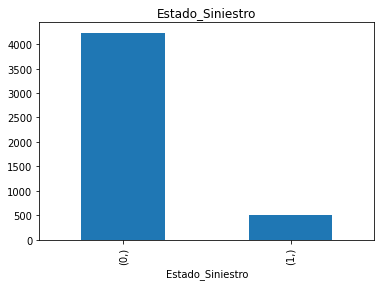

In [ ]:
# Se grafica para ver como se comporta el dummy de la variable dependiente
d1 = siniestro.value_counts()
d1.plot(kind='bar', title='Estado_Siniestro')

In [ ]:
# Eliminamos de nuestra data principal la columna Estado_Siniestro para luego reemplazarlo por el dummy creado
del(seguros_final['Estado_Siniestro'])
seguros_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Saldo_Pendiente      4732 non-null   float64
 1   Saldo_Pendiente_Seg  4732 non-null   float64
 2   Antigüedad_Maxima    4732 non-null   int64  
 3   Siniestros1          4732 non-null   int64  
 4   Siniestros2          4732 non-null   int64  
 5   Siniestros3          4732 non-null   int64  
 6   Siniestros4          4732 non-null   int64  
 7   Siniestros5          4732 non-null   int64  
 8   Siniestros6          4732 non-null   int64  
 9   Cliente_ID           4732 non-null   object 
 10  Nivel_Ingresos       4732 non-null   object 
 11  Puntaje_Morosidad1   4732 non-null   object 
 12  Puntaje_Morosidad2   4732 non-null   object 
 13  Puntaje_Morosidad3   4732 non-null   object 
 14  Puntaje_Morosidad4   4732 non-null   object 
 15  Puntaje_Morosidad5   4732 non-null   o

In [ ]:
# Unimos la data original y el dummy creado en un dataframe llamado seguros_Final
seguros_Final = pd.merge(seguros_final, siniestro, left_index=True, right_index=True)
seguros_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Saldo_Pendiente      4732 non-null   float64
 1   Saldo_Pendiente_Seg  4732 non-null   float64
 2   Antigüedad_Maxima    4732 non-null   int64  
 3   Siniestros1          4732 non-null   int64  
 4   Siniestros2          4732 non-null   int64  
 5   Siniestros3          4732 non-null   int64  
 6   Siniestros4          4732 non-null   int64  
 7   Siniestros5          4732 non-null   int64  
 8   Siniestros6          4732 non-null   int64  
 9   Cliente_ID           4732 non-null   object 
 10  Nivel_Ingresos       4732 non-null   object 
 11  Puntaje_Morosidad1   4732 non-null   object 
 12  Puntaje_Morosidad2   4732 non-null   object 
 13  Puntaje_Morosidad3   4732 non-null   object 
 14  Puntaje_Morosidad4   4732 non-null   object 
 15  Puntaje_Morosidad5   4732 non-null   o

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


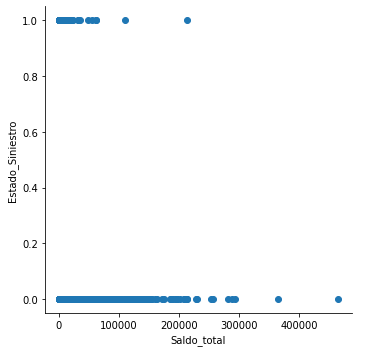

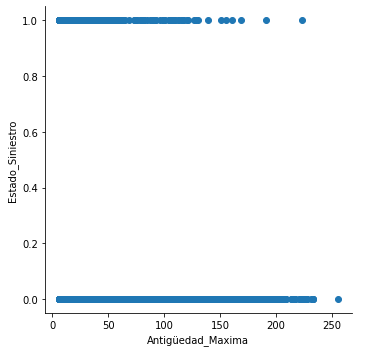

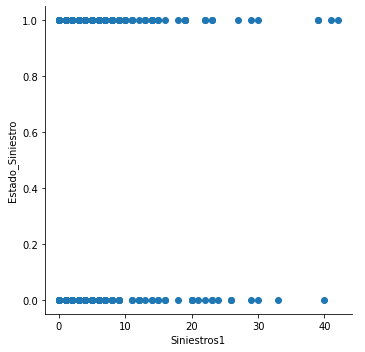

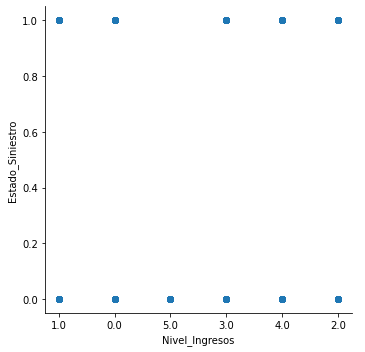

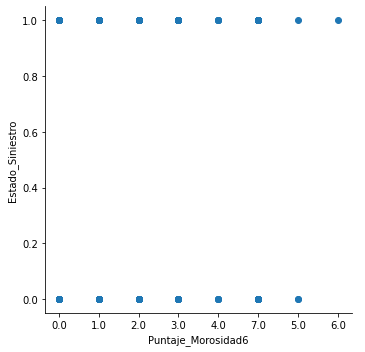

In [ ]:
# Graficamos las variables a correlacionar con la variable dependiente "Estado_Siniestro"
sns.FacetGrid(seguros_Final, size=5).map(plt.scatter, "Saldo_total", "Estado_Siniestro").add_legend()
sns.FacetGrid(seguros_Final, size=5).map(plt.scatter, "Antigüedad_Maxima", "Estado_Siniestro").add_legend()
sns.FacetGrid(seguros_Final, size=5).map(plt.scatter, "Siniestros1", "Estado_Siniestro").add_legend()
sns.FacetGrid(seguros_Final, size=5).map(plt.scatter, "Nivel_Ingresos", "Estado_Siniestro").add_legend()
sns.FacetGrid(seguros_Final, size=5).map(plt.scatter, "Puntaje_Morosidad6", "Estado_Siniestro").add_legend()

In [ ]:
# Realizamos la Correlación de spearman a Saldo_total con la variable dependiente
# Planteamiento de hipótesis:
  # Ho: No existe correlacion entre las variables A y B.
  # Ha: Existe correlacion entre las variables A y B.
  # Nivel de significancia = 5%
from scipy.stats import pearsonr, spearmanr
rho, p = spearmanr(seguros_Final['Saldo_total'], seguros_Final['Estado_Siniestro'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (rho, p))

Correlación Pearson=-0.024, p-value=0.101


*Conclusión*: Con un nivel de significancia del 5% se afirma que, no existe correlación entre las variables

## Paso 3: REGRESIÓN LOGÍSTICA

Variable dependiente: Estado_Siniestro

In [ ]:
# 1ro se verifica que todas las variables este en Dummy. Sobre todo la variable dependiente (donde Siniestro = 1 y no siniestro = 0)
seguros_Final.head()

,Saldo_Pendiente,Saldo_Pendiente_Seg,Antigüedad_Maxima,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Cliente_ID,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_total,Estado_Siniestro
0,604.86,0.0,44,0,0,0,0,0,0,185,1.0,0,0.0,0.0,0.0,0.0,0.0,604.86,0
1,1006.21,0.0,79,0,0,0,0,0,0,238,1.0,0,0.0,0.0,0.0,0.0,0.0,1006.21,0
2,299.23,0.0,102,0,0,0,0,0,0,346,1.0,0,0.0,0.0,0.0,0.0,0.0,299.23,0
3,645.19,0.0,41,0,0,0,0,0,0,460,1.0,0,0.0,0.0,0.0,0.0,0.0,645.19,0
4,218.00,0.0,109,0,0,0,0,0,0,549,1.0,0,0.0,0.0,0.0,0.0,0.0,218.00,0


In [ ]:
# Verificamos que no existan datos perdidos
seguros_Final.isnull().sum()

Saldo_Pendiente        0
Saldo_Pendiente_Seg    0
Antigüedad_Maxima      0
Siniestros1            0
Siniestros2            0
Siniestros3            0
Siniestros4            0
Siniestros5            0
Siniestros6            0
Cliente_ID             0
Nivel_Ingresos         0
Puntaje_Morosidad1     0
Puntaje_Morosidad2     0
Puntaje_Morosidad3     0
Puntaje_Morosidad4     0
Puntaje_Morosidad5     0
Puntaje_Morosidad6     0
Saldo_total            0
Estado_Siniestro       0
dtype: int64

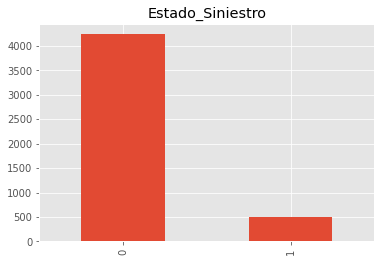

In [ ]:
# Se verifica que cada valor de la variable dependiente es mayor a 30 elementos
d1 = seguros_Final.Estado_Siniestro.value_counts()
d1.plot(kind='bar', title='Estado_Siniestro')

Regresión logística: p(y=1|X=x)=e(β0+β1x1+⋯+βpxp)/(1+e(β0+β1x1+⋯+βpxp))

In [ ]:
# Cargamos las librerias necesarias
# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind # prueba de medias

# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

Exploraremos los datos para poder intuir si existe una relación entre la variable independiente y la variable respuesta.

In [ ]:
# Analizamos la frecuencia y vemos que la data esta desbalanseada y que la diferencia es muy grande, por lo que se debería hacer un balanceo

seguros_Final.Estado_Siniestro.value_counts().sort_index()

0    4236
1     496
Name: Estado_Siniestro, dtype: int64

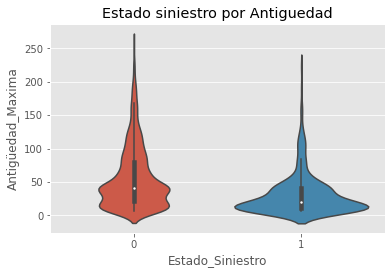

In [ ]:
# Exploramos
# Gráfico: Antiguedad Máxima

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro',  # variable dicotómica cualitativa
        y     = 'Antigüedad_Maxima',    # variable cuantitativa
        data  = seguros_Final,
        #color = "white",
        ax    = ax
    )

ax.set_title('Estado siniestro por Antiguedad');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = seguros_Final[seguros_Final['Estado_Siniestro'] ==0]['Antigüedad_Maxima'],
                x2 = seguros_Final[seguros_Final['Estado_Siniestro'] ==1]['Antigüedad_Maxima'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=11.876, p-value=0.000


Al explorar el Estado Siniestro con la Antiguedad Máxima y Observamos a nivel de gráfico como estan la Antiguedad máxima para las personas que tienen Estado de siniestro 1 y 0

Seguidamente verificamos lo mismo nuestra prueba de hipótesis de la prueba de independencia de 2 muestras
p value<0.05.

Entonces si son diferentes por lo que esta variable también se debe incorporar


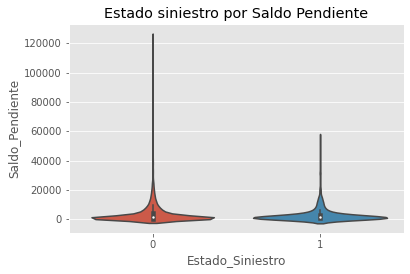

In [ ]:
# Hacemos lo mismo para las otras variables
# Gráfico: Saldo_Pendiente

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro',  # variable dicotómica cualitativa
        y     = 'Saldo_Pendiente',    # variable cuantitativa
        data  = seguros_Final,
        #color = "white",
        ax    = ax
    )

ax.set_title('Estado siniestro por Saldo Pendiente');

In [ ]:
# T-test diferencias, 
# también entra en el modelo

res_ttest = ttest_ind(
                x1 = seguros_Final[seguros_Final['Estado_Siniestro'] ==0]['Saldo_Pendiente'],
                x2 = seguros_Final[seguros_Final['Estado_Siniestro'] ==1]['Saldo_Pendiente'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=2.753, p-value=0.006


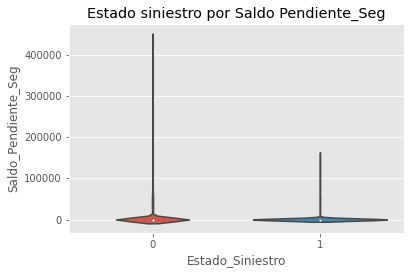

In [ ]:
# Gráfico: Saldo_Pendiente_Seg

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro',  # variable dicotómica cualitativa
        y     = 'Saldo_Pendiente_Seg',    # variable cuantitativa
        data  = seguros_Final,
        #color = "white",
        ax    = ax
    )

ax.set_title('Estado siniestro por Saldo Pendiente_Seg');

In [ ]:
# T-test diferencias, también entra en el modelo
# también entra en el modelo
res_ttest = ttest_ind(
                x1 = seguros_Final[seguros_Final['Estado_Siniestro'] ==0]['Saldo_Pendiente_Seg'],
                x2 = seguros_Final[seguros_Final['Estado_Siniestro'] ==1]['Saldo_Pendiente_Seg'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=4.612, p-value=0.000


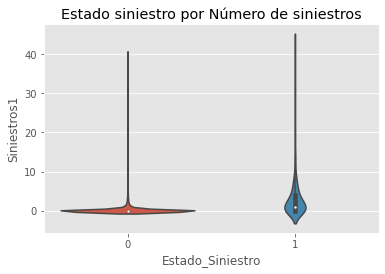

In [ ]:
# Gráfico: Siniestros1

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro',  # variable dicotómica cualitativa
        y     = 'Siniestros1',    # variable cuantitativa
        data  = seguros_Final,
        #color = "white",
        ax    = ax
    )

ax.set_title('Estado siniestro por Número de siniestros');

In [ ]:
# T-test diferencias, también entra en el modelo
# también entra en el modelo
res_ttest = ttest_ind(
                x1 = seguros_Final[seguros_Final['Estado_Siniestro'] ==0]['Siniestros1'],
                x2 = seguros_Final[seguros_Final['Estado_Siniestro'] ==1]['Siniestros1'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-24.815, p-value=0.000


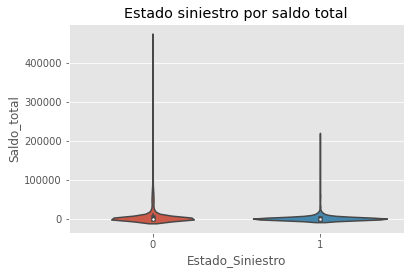

In [ ]:
# Gráfico: Saldo_total

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro',  # variable dicotómica cualitativa
        y     = 'Saldo_total',    # variable cuantitativa
        data  = seguros_Final,
        #color = "white",
        ax    = ax
    )

ax.set_title('Estado siniestro por saldo total');

In [ ]:
# T-test diferencias, también entra en el modelo
# también entra en el modelo
res_ttest = ttest_ind(
                x1 = seguros_Final[seguros_Final['Estado_Siniestro'] ==0]['Saldo_total'],
                x2 = seguros_Final[seguros_Final['Estado_Siniestro'] ==1]['Saldo_total'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=4.870, p-value=0.000


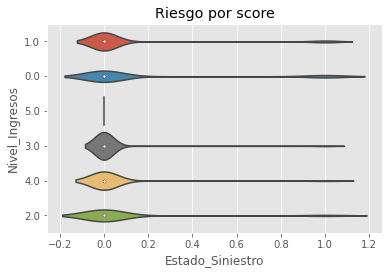

In [ ]:
# Gráfico: Nivel de Ingresos
# Vemos que para cada nivel de ingresos tiene distinto comportamiento

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro',
        y     = 'Nivel_Ingresos',
        data  = seguros_Final,
        #color = "white",
        ax    = ax
    )

ax.set_title('Riesgo por score');

# **AJUSTE DEL MODELO**

In [ ]:
# Volvemos a revisar la data
seguros_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Saldo_Pendiente      4732 non-null   float64
 1   Saldo_Pendiente_Seg  4732 non-null   float64
 2   Antigüedad_Maxima    4732 non-null   int64  
 3   Siniestros1          4732 non-null   int64  
 4   Siniestros2          4732 non-null   int64  
 5   Siniestros3          4732 non-null   int64  
 6   Siniestros4          4732 non-null   int64  
 7   Siniestros5          4732 non-null   int64  
 8   Siniestros6          4732 non-null   int64  
 9   Cliente_ID           4732 non-null   object 
 10  Nivel_Ingresos       4732 non-null   object 
 11  Puntaje_Morosidad1   4732 non-null   object 
 12  Puntaje_Morosidad2   4732 non-null   object 
 13  Puntaje_Morosidad3   4732 non-null   object 
 14  Puntaje_Morosidad4   4732 non-null   object 
 15  Puntaje_Morosidad5   4732 non-null   o

In [ ]:
# Cargamos los Datos en X e Y.

X_data = seguros_Final.drop(columns = ['Estado_Siniestro', 'Nivel_Ingresos', 'Cliente_ID', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2',
                                        'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Saldo_total'])
Y_data = seguros_Final['Estado_Siniestro']

print(X_data.head())
print(Y_data.head())

   Saldo_Pendiente  Saldo_Pendiente_Seg  Antigüedad_Maxima  Siniestros1  \
0           604.86                  0.0                 44            0   
1          1006.21                  0.0                 79            0   
2           299.23                  0.0                102            0   
3           645.19                  0.0                 41            0   
4           218.00                  0.0                109            0   

   Siniestros2  Siniestros3  Siniestros4  Siniestros5  Siniestros6  
0            0            0            0            0            0  
1            0            0            0            0            0  
2            0            0            0            0            0  
3            0            0            0            0            0  
4            0            0            0            0            0  
0    0
1    0
2    0
3    0
4    0
Name: Estado_Siniestro, dtype: uint8


In [ ]:
X_data = sm.add_constant(X_data, prepend=True)

In [ ]:
# Creación del modelo

modelo = sm.Logit(endog=Y_data, exog=X_data,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       Estado_Siniestro   No. Observations:                 4732
Model:                          Logit   Df Residuals:                     4722
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                     inf
Time:                        22:25:37   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7844      0.090    -19.885      0.000      -1.960      -1.608
Saldo_P

Tomando en cuenta las otras variables, 
1. Saldo_Pendiente tiene un p-value >= 0.5 por lo que debemos de sacarlo del modelo
2. Siniestros2 tiene un p-value >= 0.5 por lo que debemos de sacarlo del modelo
3. Siniestros3 tiene un p-value >= 0.5 por lo que debemos de sacarlo del modelo
4. Siniestros4 tiene un p-value >= 0.5 por lo que debemos de sacarlo del modelo

El Pseudo R cuadrado que nos ha inferido es como un 0, por lo que no tenemos buen nivel de performance, hasta este momento, y quizas se puede generar nuevas variables, pero no es posible nueva data 

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# Generamos nuestra variable de confianza para cada uno de los coeficientes de nuestro modelo, 
  # para ver entre que valores oscilarían si la muestras ubiera sido distinta, 
  # por lo que se le puede hacer a algunas variables unas transformadas

intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-1.960230,-1.608482
Saldo_Pendiente,-0.000021,0.000023
Saldo_Pendiente_Seg,-0.000036,-0.000008
Antigüedad_Maxima,-0.020859,-0.013399
Siniestros1,0.622721,0.937616
Siniestros2,-0.193789,0.218762
Siniestros3,-0.471166,0.000768
Siniestros4,-0.123530,0.359056
Siniestros5,-0.645157,-0.094739
Siniestros6,-0.401769,-0.003628


In [ ]:
# Predicciones con intervalo de confianza 
import numpy as np
predicciones = modelo.predict(exog = X_data)

# Clasificación de las predicciones

clasificacion = np.where(predicciones < 0.5, 0, 1)
clasificacion

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Matriz de confusión de las predicciones

confusion_matrix = pd.crosstab(
    Y_data.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,4194,42
1,382,114


In [ ]:
# Vemos la clasificación del reporte
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = Y_data,
        y_pred = clasificacion
    )
)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4236
           1       0.73      0.23      0.35       496

    accuracy                           0.91      4732
   macro avg       0.82      0.61      0.65      4732
weighted avg       0.90      0.91      0.89      4732




El p-value del predictor del riesgo no es significativo (p-value = 1.000). Se sugiere crear nuevas variables y buscar mejorar el modelo paramétrico.

Es decir, el modelo sólo es capaz de identificar un 16% de los clientes siniestros. Esto significa que el modelo del ejemplo sólo es capaz de identificar 1 de cada 10 de los clientes que nos generan riesgo.

# MODELO DE INTERDEPENDENCIA

In [ ]:
# Realizamo la instalación de Skimpy que nos ayudara al análisis descriptivo
!pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
# Desinstalamos Panda para reemplazarlo por otra versión que necesitaremos para que funcione skimpy
!pip uninstall pandas
!pip install pandas==1.1.5  #para trabajar con skimpy


Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.1.5-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.5 requires pandas<2.0.0,>=1.3.2, but you have pandas 1.1.5 which is incompatible.


In [ ]:
# Instalamos las librerias a utilizar
# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

# DATA

In [ ]:
# Verificamos nuestra Data
seguros_Final.head()

,Saldo_Pendiente,Saldo_Pendiente_Seg,Antigüedad_Maxima,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Cliente_ID,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_total,Estado_Siniestro
0,604.86,0.0,44,0,0,0,0,0,0,185,1.0,0,0.0,0.0,0.0,0.0,0.0,604.86,0
1,1006.21,0.0,79,0,0,0,0,0,0,238,1.0,0,0.0,0.0,0.0,0.0,0.0,1006.21,0
2,299.23,0.0,102,0,0,0,0,0,0,346,1.0,0,0.0,0.0,0.0,0.0,0.0,299.23,0
3,645.19,0.0,41,0,0,0,0,0,0,460,1.0,0,0.0,0.0,0.0,0.0,0.0,645.19,0
4,218.00,0.0,109,0,0,0,0,0,0,549,1.0,0,0.0,0.0,0.0,0.0,0.0,218.00,0


In [ ]:
# Borramos el Cliente_ID por que ya no lo usaremos
seguros_Final = seguros_Final.drop(['Cliente_ID'], axis=1)
seguros_Final.info()

KeyError: ignored

# ANÁLISIS DE COMPONENTES PRINCIPALES


In [ ]:
# Analisamos el resumen estadístico de todas las variables numéricas
from skimpy import skim
skim(seguros_Final)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 4732   │ │ int64       │ 7     │                                    │
│ │ Number of columns │ 18     │ │ object      │ 7     │                                    │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                    │
│                                │ uint8       │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃           ┃ missing ┃ complete  ┃ mean ┃ sd    ┃ p0   ┃ p25 ┃ p75  ┃ p100   ┃ hist   ┃  │
│ ┃           ┃         ┃ rate      ┃      ┃       ┃      ┃     ┃      ┃        ┃        ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Saldo_Pen │       0 │         1 │ 3700 │  6600 │ 0.01 │ 470 │ 3900 │ 120000 │   █    │  │
│ │ diente    │         │           │      │       │      │     │      │        │        │  │
│ │ Saldo_Pen │       0 │         1 │ 5500 │ 23000 │    0 │   0 │    0 │ 440000 │   █    │  │
│ │ diente_Se │         │           │      │       │      │     │      │        │        │  │
│ │ g         │         │           │      │       │      │     │      │        │        │  │
│ │ Antigüeda │       0 │         1 │   54 │    45 │    6 │  18 │   76 │    260 │  █▃▂▁  │  │
│ │ d_Maxima  │         │           │      │       │      │     │      │        │        │  │
│ │ Siniestro │       0 │         1 │ 0.63 │   2.7 │    0 │   0 │    0 │     42 │   █    │  │
│ │ s1        │         │           │      │       │      │     │      │        │        │  │
│ │ Siniestro │       0 │         1 │ 0.55 │   2.4 │    0 │   0 │    0 │     40 │   █    │  │
│ │ s2        │         │           │      │       │      │     │      │        │        │  │
│ │ Siniestro │       0 │         1 │ 0.49 │   2.3 │    0 │   0 │    0 │     40 │   █    │  │
│ │ s3        │         │           │      │       │      │     │      │        │        │  │
│ │ Siniestro │       0 │         1 │ 0.46 │   2.2 │    0 │   0 │    0 │     40 │   █    │  │
│ │ s4        │         │           │      │       │      │     │      │        │        │  │
│ │ Siniestro │       0 │         1 │ 0.42 │   2.1 │    0 │   0 │    0 │     40 │   █    │  │
│ │ s5        │         │           │      │       │      │     │      │        │        │  │
│ │ Siniestro │       0 │         1 │ 0.38 │   2.1 │    0 │   0 │    0 │     40 │   █    │  │
│ │ s6        │         │           │      │       │      │     │      │        │        │  │
│ │ Saldo_tot │       0 │         1 │ 9200 │ 26000 │ 0.01 │ 510 │ 5300 │ 460000 │   █    │  │
│ │ al        │         │           │      │       │      │     │      │        │        │  │
│ │ Estado_Si │       0 │         1 │  0.1 │  0.31 │    0 │   0 │    0 │      1 │ █    ▁ │  │
│ │ niestro   │         │           │      │       │      │     │      │        │        │  │
│ └───────────┴─────────┴───────────┴──────┴───────┴──────┴─────┴──────┴────────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [ ]:
# Analizamos las medias para luego compararlos con las varianzas
print('----------------------')
print('Media de cada variable')
print('----------------------')
seguros_Final.mean(axis=0)

----------------------
Media de cada variable
----------------------


Saldo_Pendiente        3660.035167
Saldo_Pendiente_Seg    5548.862540
Antigüedad_Maxima        53.559806
Siniestros1               0.633770
Siniestros2               0.550719
Siniestros3               0.493026
Siniestros4               0.460693
Siniestros5               0.418005
Siniestros6               0.384827
Puntaje_Morosidad1             inf
Saldo_total            9208.897707
Estado_Siniestro          0.104818
dtype: float64

In [ ]:
# Vemos las varianzas
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
seguros_Final.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Saldo_Pendiente        4.302383e+07
Saldo_Pendiente_Seg    5.424635e+08
Antigüedad_Maxima      2.039030e+03
Siniestros1            7.110193e+00
Siniestros2            5.893221e+00
Siniestros3            5.169049e+00
Siniestros4            5.049184e+00
Siniestros5            4.525721e+00
Siniestros6            4.309074e+00
Saldo_total            6.645565e+08
Estado_Siniestro       9.385122e-02
dtype: float64

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(seguros_Final)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_


array([[-2.42504205e-02, -1.98068084e-02, -3.63401873e-02,
         3.15728369e-01,  3.21959292e-01,  3.22979325e-01,
         3.19682077e-01,  3.10919678e-01,  3.00502754e-01,
        -4.95536151e-02,  1.71955243e-01,  2.71231863e-01,
         2.68515822e-01,  2.63483522e-01,  2.57191864e-01,
         2.47705035e-01, -2.40654087e-02,  1.60224210e-01],
       [ 4.76689274e-02,  8.71009108e-02,  7.67118685e-02,
         2.09535211e-01,  2.34487088e-01,  2.59085133e-01,
         2.69212489e-01,  2.82432930e-01,  2.89813797e-01,
         8.22845459e-02, -1.82893809e-01, -3.13389354e-01,
        -3.29558673e-01, -3.24067287e-01, -3.23949981e-01,
        -2.94168499e-01,  9.08230391e-02, -1.73828945e-01],
       [ 3.88610939e-01,  5.28728702e-01,  2.06216952e-01,
        -3.80247310e-02, -3.25964778e-02, -3.01669595e-02,
        -1.23614199e-02, -1.45838335e-02, -1.20019176e-02,
         3.72749228e-01, -4.86608588e-02,  6.91760722e-02,
         8.77050043e-02,  1.00972203e-01,  1.05470670e

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
componentes = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = seguros_Final.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
)

componentes = componentes.transpose()
componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Saldo_Pendiente,-0.024250,0.047669,0.388611,-0.058771,-0.298589,0.713479,0.455862,-0.013402,0.016184,0.040171,-0.010642,0.005675,0.004603,-0.001015,0.002913,0.000161,0.000124,-1.855205e-01
Saldo_Pendiente_Seg,-0.019807,0.087101,0.528729,-0.231929,0.350160,-0.316773,-0.031178,0.010021,0.001836,-0.024652,0.004851,-0.001068,-0.000075,-0.003505,-0.006021,-0.001658,-0.001980,-6.587530e-01
Antigüedad_Maxima,-0.036340,0.076712,0.206217,0.361214,-0.582022,-0.574789,0.381166,0.067739,0.025516,-0.008261,0.004822,0.002183,-0.005893,0.000576,0.000567,-0.001819,-0.000135,-3.608225e-16
Siniestros1,0.315728,0.209535,-0.038025,-0.114842,-0.080805,0.003960,-0.012631,-0.109397,0.253531,-0.528699,-0.014388,-0.008047,-0.021150,0.372454,0.214019,-0.542175,0.010267,-1.786765e-16
Siniestros2,0.321959,0.234487,-0.032596,-0.058556,-0.047127,0.009761,-0.007717,-0.070115,0.222519,-0.393462,-0.006652,0.001264,-0.005109,0.052762,-0.179884,0.767909,0.018706,1.977585e-16
Siniestros3,0.322979,0.259085,-0.030167,0.009567,-0.003494,0.013126,-0.002008,-0.012260,0.045925,-0.044799,0.060503,0.066859,0.028650,-0.693918,-0.458027,-0.307789,-0.167652,4.857226e-17
Siniestros4,0.319682,0.269212,-0.012361,0.051743,0.034160,0.007665,-0.001348,0.039080,-0.065219,0.201393,0.050255,0.004793,-0.015409,-0.324665,0.607605,0.066601,0.541403,2.359224e-16
Siniestros5,0.310920,0.282433,-0.014584,0.073244,0.049947,0.008572,0.008324,0.063326,-0.179286,0.303747,-0.015639,-0.068624,0.030287,0.147378,0.312940,0.086264,-0.744289,2.428613e-17
Siniestros6,0.300503,0.289814,-0.012002,0.086648,0.055476,0.010638,0.006150,0.075209,-0.230039,0.385801,-0.054849,-0.004378,-0.006887,0.483644,-0.491419,-0.091176,0.347298,8.326673e-17
Nivel_Ingresos,-0.049554,0.082285,0.372749,0.181689,-0.406458,0.142537,-0.794840,-0.021254,-0.031173,0.006511,0.004338,-0.004119,0.000509,-0.000681,0.000210,0.001269,-0.004657,-1.665335e-16


### Influencia de las variables en cada componetes

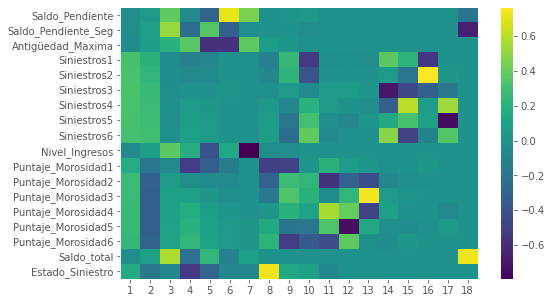

In [ ]:
# Para decidir con que componentes nos vamos a quedar
# 1° Hacemos un Heatmap de los 18 componentes para hacer nuestro mapa de calor

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(seguros_Final.columns)), seguros_Final.columns)
plt.xticks(range(len(seguros_Final.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Observamos que los azules oscuros muestran que en esas variables ocurre algo raro respecto a los nuevos componentes

### Varianza explicada de cada componente

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[4.06812300e-01 1.60358255e-01 1.38959552e-01 7.46649488e-02
 5.72917928e-02 4.23244666e-02 3.37869874e-02 2.42710873e-02
 1.67556681e-02 1.47974814e-02 9.25175451e-03 7.22084705e-03
 6.20645238e-03 3.17772608e-03 1.90349045e-03 1.22268300e-03
 9.94507965e-04 1.67287402e-33]


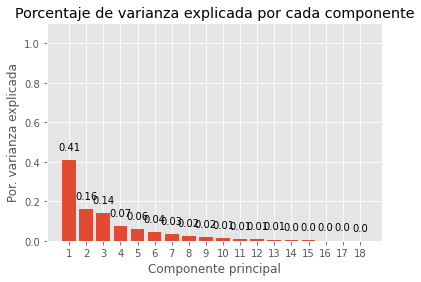

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(seguros_Final.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Vemos que los primeros componentes explican valores mas altos y disminuye en los últimos componentes

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.4068123  0.56717055 0.70613011 0.78079506 0.83808685 0.88041131
 0.9141983  0.93846939 0.95522506 0.97002254 0.97927429 0.98649514
 0.99270159 0.99587932 0.99778281 0.99900549 1.         1.        ]


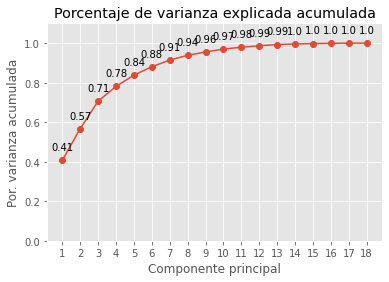

In [ ]:
# Porcentaje de varianza explicada acumulada para determinar donde cortar

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(seguros_Final.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(seguros_Final.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Por los gráficos se concluye cortar despues de los 5 primeros componentes ya que el sexto tiene menos del 5% de porcentaje de varianza explicada

Sin embargo, gracias al mapa de calor, observamos:
1. El componente 4 esta explicado basicamente por el Estado siniestro y el siniesstro1
2. El componente 5 esta explicado basicamente por la Antiguedad Máxima (meses)

Sin embargo como las otras variables estan cerca al valor de estas variables observadas (diferencia de 6 a 3 por ejemplo), se va a incluir esos componentes.

CONCLUSIÓN: Nos quedaremos con los 5 primeros componentes.

## **SEGMENTACIÓN DE DATOS**

In [ ]:
# Vamos a levantar nuestras librerias a utilizar
# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_blobs

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Verificamos nuevamente nuestra Data
seguros_Final.head()

,Saldo_Pendiente,Saldo_Pendiente_Seg,Antigüedad_Maxima,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_total,Estado_Siniestro
0,604.86,0.0,44,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,604.86,0
1,1006.21,0.0,79,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,1006.21,0
2,299.23,0.0,102,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,299.23,0
3,645.19,0.0,41,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,645.19,0
4,218.00,0.0,109,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,218.00,0


In [ ]:
# Realizamos la Estandarización de las variables para que todas tengan el mismo peso

datos_scaled = scale(X=seguros_Final, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=seguros_Final.columns, index=seguros_Final.index)
datos_scaled.head(4)

,Saldo_Pendiente,Saldo_Pendiente_Seg,Antigüedad_Maxima,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_total,Estado_Siniestro
0,-0.465830,-0.238267,-0.211730,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.130766,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.333797,-0.342186
1,-0.404635,-0.238267,0.563449,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.130766,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.318226,-0.342186
2,-0.512430,-0.238267,1.072852,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.130766,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.345654,-0.342186
3,-0.459681,-0.238267,-0.278174,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.130766,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.332232,-0.342186


In [ ]:
# Cálculo de distancias euclidianas para comparar los index con los otros index
# A menor distancia mayor similitud

print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.head(8)

------------------
Distancia euclídea
------------------


,0,1,2,3,4,5,6,7,8,9,...,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.777747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.285482,0.521406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.066746,0.843538,1.352123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.440905,0.675913,0.155562,1.507561,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.079990,2.308713,1.794562,3.146598,1.639276,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.995877,2.264316,1.840753,3.057883,1.716039,1.045086,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.765086,1.621524,1.715010,1.793025,1.773042,2.868214,2.851025,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se reestructura la matriz de distancias para poder ordenar los pares de observaciones por orden de distancia.

In [ ]:
# Vemos el resumen de las personas que son más similares
# Top n registros más similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(10)

,estado_a,estado_b,distancia
11625516,3724,2456,0.000005
4195008,2456,886,0.000013
4196276,3724,886,0.000017
5379035,3483,1136,0.000028
581144,3840,122,0.000035
1662068,1136,351,0.000057
4206318,4302,888,0.000063
810041,869,171,0.000066
508327,2003,107,0.000066
4579568,3724,967,0.000079


### Número óptimo de Clústers

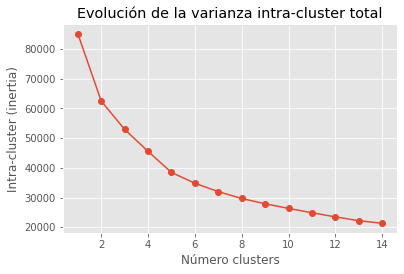

In [ ]:
# Utilizamnos el Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Conclusión: Por el comportamiento de la curva, vemos que a partir del 4to y 5to cluster la curva es más constante, en tal sentido se considera que con 4 cluster se trabajará.

Seleccionamos 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=4).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)


[[-1.64130135e-01 -2.14088900e-01 -4.67755799e-01  1.22318582e+00
   1.06549088e+00  8.36030491e-01  6.87705510e-01  6.03915660e-01
   4.93028914e-01 -5.06503871e-01  2.55733089e+00  1.47299103e+00
   1.22328586e+00  9.66709327e-01  9.59444938e-01  7.68858920e-01
  -2.35186954e-01  2.46553365e+00]
 [ 1.74165129e-02  1.83453328e-02  3.74356677e-02 -1.72981217e-01
  -1.65033092e-01 -1.52566445e-01 -1.41932201e-01 -1.34632533e-01
  -1.23550880e-01  4.55403287e-02 -2.18121984e-01 -1.94050602e-01
  -1.78122906e-01 -1.60689050e-01 -1.56439336e-01 -1.38717653e-01
   2.10061602e-02 -2.11543299e-01]
 [-3.50017539e-01  8.68631971e-03  7.38619803e-02  7.86564874e+00
   8.30531149e+00  8.91655614e+00  9.05958830e+00  9.10677388e+00
   8.96852423e+00 -4.22751941e-01  9.93712241e-01  2.62915904e+00
   2.51648539e+00  2.78663724e+00  2.57759786e+00  2.53712704e+00
  -8.12111851e-02  7.74639923e-01]
 [-2.03367230e-01 -2.21587903e-01 -1.50032417e-01  1.04822893e+00
   1.15617314e+00  1.21275540e+00  1.

In [ ]:
# Confirmamos el número de Cluster
kmeans.n_clusters


4

In [ ]:
# Identificamos a que grupo pertenece cada uno
cluster = kmeans.predict(datos_scaled)
cluster

array([1, 1, 1, ..., 1, 3, 0], dtype=int32)

## Clúster en Data Original "seguros_Final"

In [ ]:
# Para ello subimos El cluster en nuestro DataFrame original "seguros_Final", en la columna llamada cluster (variable nominal)
cols = seguros_Final.columns

seguros_Final['cluster'] = cluster
seguros_Final.head()

,Saldo_Pendiente,Saldo_Pendiente_Seg,Antigüedad_Maxima,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_total,Estado_Siniestro,cluster
0,604.86,0.0,44,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,604.86,0,1
1,1006.21,0.0,79,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,1006.21,0,1
2,299.23,0.0,102,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,299.23,0,1
3,645.19,0.0,41,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,645.19,0,1
4,218.00,0.0,109,0,0,0,0,0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,218.00,0,1


In [ ]:
# Realizamos un agrupamiento de la tabla bajo el cluster para todas las columnas numéricas
# Perfilando cada Estrato. Podemos añadir variables cualitativas para su mejor entendimiento.
#---------------------------------------------------------------------------------------------
seguros_Final.groupby(['cluster'])[cols].mean().round(2).T

cluster,0,1,2,3
Saldo_Pendiente,2583.58,3774.26,1364.42,2326.24
Saldo_Pendiente_Seg,563.08,5976.10,5751.15,388.44
Antigüedad_Maxima,32.44,55.25,56.89,46.79
Siniestros1,3.90,0.17,21.61,3.43
Siniestros2,3.14,0.15,20.71,3.36
Siniestros3,2.39,0.15,20.76,3.25
Siniestros4,2.01,0.14,20.82,3.14
Siniestros5,1.70,0.13,19.79,2.61
Siniestros6,1.41,0.13,19.00,2.18
Saldo_total,3146.66,9750.36,7115.58,2714.68


Ahí podemos comparar las medias de cada cluster según su variable, viendo mayor diferencia como ejemplo el saldo total del 4to cluster es el menor de todos

Tambien se ven variables que están teniendo el mismo resultado en cada grupo cluster, por lo que se puede retirar ya que no esta aportando información

In [ ]:
# Verificamos el tamaño de cada cluster
# Tabla de frecuencia del Cluster
cluster_count = (seguros_Final
                       .groupby("cluster")
                       .agg(frequency=("cluster", "count")))

cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count

,frequency,Acumulado
cluster,,
0,343,343
1,4323,4666
2,38,4704
3,28,4732


Vemos que hay bastante diferencia en la frecuencia de los cluster siendo el 1 el más grande

## Graficando las variables numéricas input

In [ ]:
# Realizaremos nuestro gráfico de violín de nuestras variables numéricas, para ver como se comportan
# Llamamos la libreria
import seaborn as sns

def graficar_nums(cluster, var_num, data):

  fig, ax = plt.subplots(figsize=(6, 3.84))

  sns.violinplot(
          x     = cluster,
          y     = var_num,
          data  = data,
          #color = "white",
          ax    = ax
      )

  ax.set_title(f'{var_num} por Cluster');

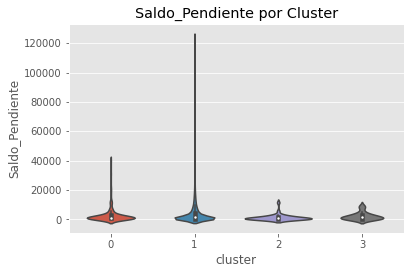

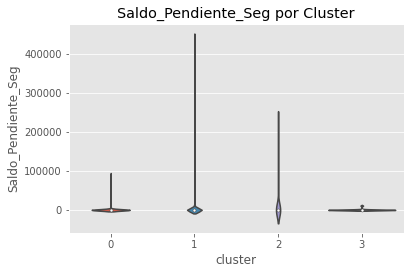

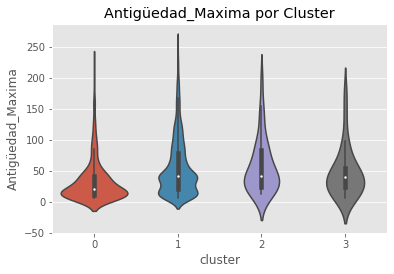

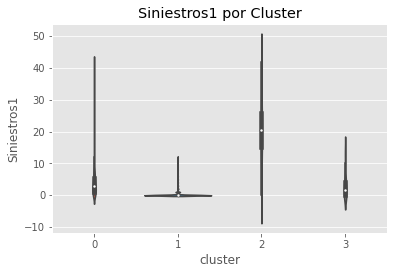

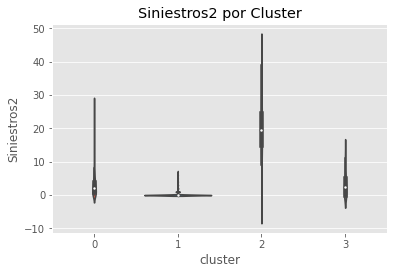

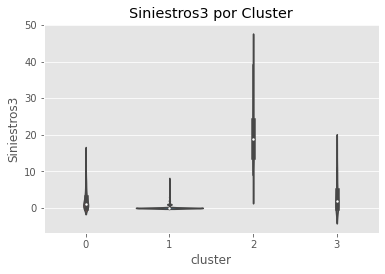

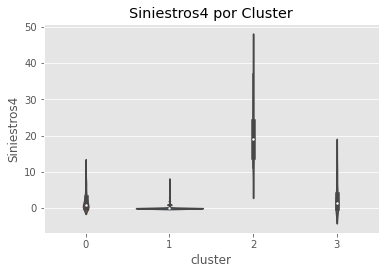

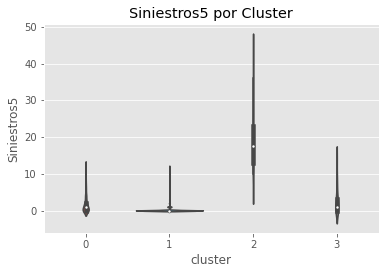

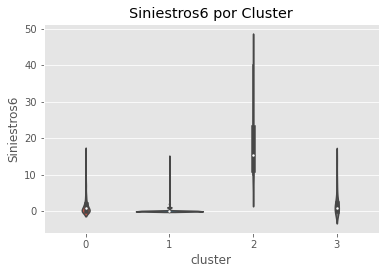

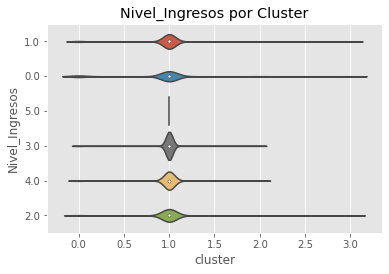

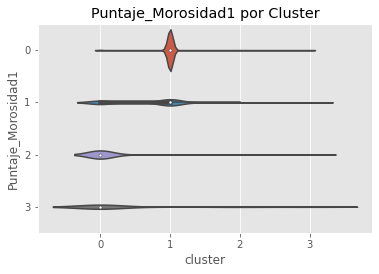

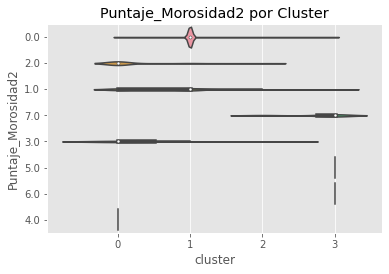

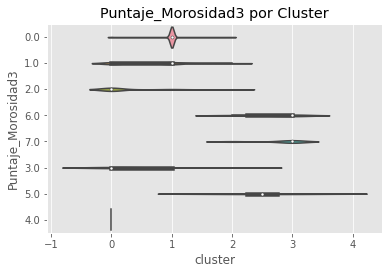

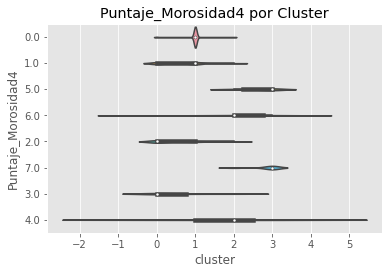

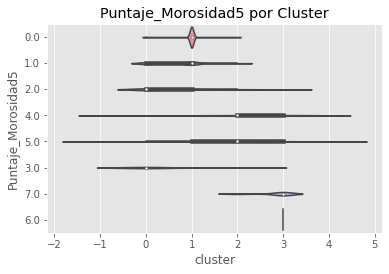

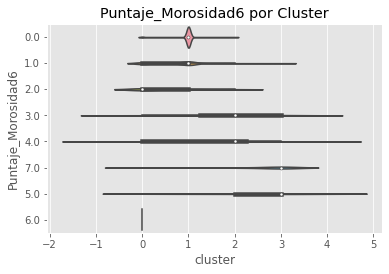

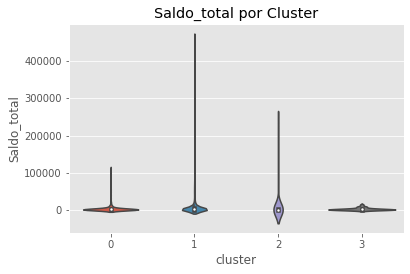

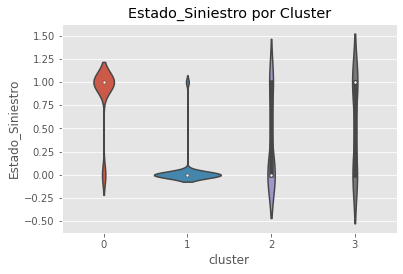

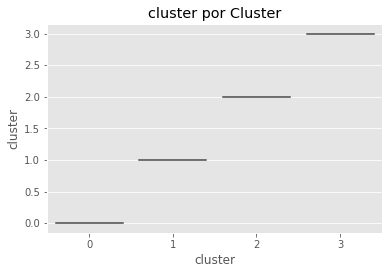

In [ ]:
cluster = 'cluster'

for i in cols: 
  graficar_nums(cluster, i, seguros_Final)

Conclusión: La mayoría de variables que hemos incorporado están aportando información a nuestra clusterización, pero se confirmará con la prueba de ANOVA

## Prueba

In [ ]:
# ANOVA con la variable Saldo_total

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Saldo_total ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df        F    PR(>F)
cluster   5.578087e+09     1.0  8.40684  0.003755
Residual  3.138439e+12  4730.0      NaN       NaN


Observamos que el pValue (0.003755) < 0.05, por lo que rechazamos la Ho y aceptamos la Ha

Conclusión: Al menos 2 grupos de Cluster son estadísticamente diferentes en cuanto a su Saldo total

Así realizaremos para las otras variables

In [ ]:
mod = ols('Antigüedad_Maxima ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df          F        PR(>F)
cluster   1.018542e+05     1.0  50.474632  1.387121e-12
Residual  9.544798e+06  4730.0        NaN           NaN


In [ ]:
mod = ols('Siniestros1 ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df         F    PR(>F)
cluster      56.862453     1.0  8.009163  0.004674
Residual  33581.461089  4730.0       NaN       NaN


In [ ]:
mod = ols('Siniestros2 ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df         F    PR(>F)
cluster       2.719952     1.0  0.461487  0.496963
Residual  27878.107605  4730.0       NaN       NaN


In [ ]:
mod = ols('Siniestros3 ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df          F        PR(>F)
cluster     155.032980     1.0  30.177528  4.149077e-08
Residual  24299.736885  4730.0        NaN           NaN


In [ ]:
mod = ols('Siniestros4 ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df          F        PR(>F)
cluster     323.005653     1.0  64.835021  1.021844e-15
Residual  23564.683273  4730.0        NaN           NaN


In [ ]:
mod = ols('Siniestros5 ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df          F        PR(>F)
cluster     364.231138     1.0  81.855703  2.095452e-19
Residual  21046.954830  4730.0        NaN           NaN


In [ ]:
mod = ols('Siniestros6 ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df          F        PR(>F)
cluster     434.855779     1.0  103.09404  5.620322e-24
Residual  19951.374779  4730.0        NaN           NaN


In [ ]:
mod = ols('Estado_Siniestro ~ cluster', data =seguros_Final).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

              sum_sq      df            F         PR(>F)
cluster   106.337132     1.0  1489.531642  1.528376e-283
Residual  337.673012  4730.0          NaN            NaN


CONSLUSIÓN

Al analizar todas las variables observamos:

**Todas las variables** si nos esta aportando información para diferenciar nuestro cluster, a excepción de Siniestros2 (pValue = 0.49696)>0.05

Se puede eliminar a Siniestros2 de nuestro modelo

## Prueba cada par de Clusters

In [ ]:
# Instalamos la libreria para realizar la prueba de Tukey
# Para comparar cada 2 cluster y ver si son o no estadísticamente diferentes
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.3 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=b7257f8e5ba25a4a495a2c9ca07e0a4e795970539387d8f3f72c2b529f0582c1
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=d42e615b3b8666db6544ad968a368a1ae0726b90a5693969801d0a265d95fc99
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
# prueba Tukey cada par de grupos.

from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Saldo_total', xfac_var='cluster', anova_model='Saldo_total ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,6603.702760,2890.218987,10317.186534,6.463140,0.001000
1,1,2,2634.781838,-8151.144958,13420.708635,0.887820,0.900000
2,1,3,7035.681368,-5515.128467,19586.491203,2.037380,0.474883
3,0,2,3968.920922,-7349.151555,15286.993399,1.274493,0.779327
4,0,3,431.978608,-12578.992734,13442.949949,0.120667,0.900000
5,2,3,4400.899530,-12086.417728,20888.216788,0.970128,0.900000


Con Tukey podemos comprobar que hay grupos con pValue > 0.05, por lo que respecto a Saldo_total, todos los grupos son iguales, a excepción del grupo (Cluster 1 con cluster 0).

Realizamos lo mismo para las demás variables

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Antigüedad_Maxima', xfac_var='cluster', anova_model='Antigüedad_Maxima ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,22.809825,16.333806,29.285843,12.801223,0.001000
1,1,2,1.644679,-17.165114,20.454472,0.317786,0.900000
2,1,3,8.464344,-13.423264,30.351951,1.405506,0.727332
3,0,2,24.454504,4.716691,44.192316,4.502953,0.007967
4,0,3,14.345481,-8.344611,37.035573,2.297822,0.365373
5,2,3,10.109023,-18.643539,38.861584,1.277822,0.778005


Respecto a Antiguedad máxima, todos los grupos son iguales, a excepción del grupo de comparación de cluster: "1 con 0" y "0 con 2".

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Siniestros1', xfac_var='cluster', anova_model='Siniestros1 ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,3.722478,3.338352,4.106605,35.220480,0.001000
1,1,2,21.432698,20.316990,22.548406,69.817451,0.001000
2,1,3,3.256006,1.957737,4.554275,9.115029,0.001000
3,0,2,17.710219,16.539466,18.880973,54.978905,0.001000
4,0,3,0.466472,-0.879396,1.812341,1.259682,0.785205
5,2,3,18.176692,16.471226,19.882157,38.735526,0.001000


Respecto a Siniestros1, todos los grupos son diferentes, a excepción del grupo de comparación de cluster: "0 con 3".

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Siniestros2', xfac_var='cluster', anova_model='Siniestros2 ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,2.986899,2.636908,3.336890,31.017142,0.001
1,1,2,20.560399,19.543841,21.576957,73.508377,0.001
2,1,3,3.207016,2.024120,4.389912,9.853536,0.001
3,0,2,17.573500,16.506788,18.640212,59.875418,0.001
4,0,3,0.220117,-1.006149,1.446382,0.652388,0.900
5,2,3,17.353383,15.799477,18.907290,40.587933,0.001


`Respecto a Siniestros2, todos los grupos son diferentes, a excepción del grupo de comparación de cluster: "0 con 3".`

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Siniestros3', xfac_var='cluster', anova_model='Siniestros3 ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,2.247391,1.920634,2.574149,24.997166,0.001000
1,1,2,20.616963,19.667886,21.566040,78.951584,0.001000
2,1,3,3.103805,1.999432,4.208178,10.214482,0.001000
3,0,2,18.369572,17.373670,19.365473,67.037867,0.001000
4,0,3,0.856414,-0.288449,2.001277,2.718740,0.218794
5,2,3,17.513158,16.062403,18.963912,43.874087,0.001000


Respecto a Siniestros3, todos los grupos son diferentes, a excepción del grupo de comparación de cluster: "0 con 3".

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Siniestros4', xfac_var='cluster', anova_model='Siniestros4 ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,1.864031,1.542254,2.185809,21.054031,0.001000
1,1,2,20.673990,19.739378,21.608602,80.395258,0.001000
2,1,3,3.001057,1.913516,4.088599,10.029197,0.001000
3,0,2,18.809959,17.829235,19.790682,69.707414,0.001000
4,0,3,1.137026,0.009612,2.264441,3.665425,0.047177
5,2,3,17.672932,16.244289,19.101576,44.959578,0.001000


Respecto a Siniestros4, todos los grupos son diferentes

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Siniestros5', xfac_var='cluster', anova_model='Siniestros5 ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,1.571002,1.266900,1.875104,18.775654,0.001000
1,1,2,19.657852,18.774578,20.541126,80.886933,0.001000
2,1,3,2.475521,1.447719,3.503324,8.753761,0.001000
3,0,2,18.086850,17.159998,19.013702,70.923512,0.001000
4,0,3,0.904519,-0.160967,1.970004,3.085373,0.128277
5,2,3,17.182331,15.832163,18.532499,46.252143,0.001000


Respecto a Siniestros5, todos los grupos son diferentes, a excepción del grupo de comparación de cluster: "0 con 3".

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Siniestros6', xfac_var='cluster', anova_model='Siniestros5 ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,1.279780,0.975678,1.583882,15.295146,0.001000
1,1,2,18.871617,17.988343,19.754891,77.651781,0.001000
2,1,3,2.050188,1.022386,3.077991,7.249729,0.001000
3,0,2,17.591837,16.664985,18.518688,68.982430,0.001000
4,0,3,0.770408,-0.295077,1.835894,2.627913,0.246443
5,2,3,16.821429,15.471261,18.171597,45.280650,0.001000


Respecto a Siniestros6, todos los grupos son diferentes, a excepción del grupo de comparación de cluster: "0 con 3".

In [ ]:
res = stat()
res.tukey_hsd(df=seguros_Final, res_var='Estado_Siniestro', xfac_var='cluster', anova_model='Estado_Siniestro ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,0,0.820040,0.781521,0.858559,77.374817,0.001000
1,1,2,0.302087,0.190208,0.413966,9.813422,0.001000
2,1,3,0.495696,0.365510,0.625881,13.838522,0.001000
3,0,2,0.517953,0.400554,0.635352,16.034822,0.001000
4,0,3,0.324344,0.189385,0.459303,8.734588,0.001000
5,2,3,0.193609,0.022591,0.364627,4.114545,0.019067


Respecto a Estado_siniestro, todos los grupos son diferentes